In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [43]:
df = pd.get_dummies(df)
X = df.drop("charges",1)
y = df[["charges"]]

C:\Users\oscar\AppData\Local\Temp\ipykernel_22476\2718739676.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("charges",1)


In [44]:
X.head()

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [46]:
lr_test = LinearRegression()
lr_test.fit(X_train, y_train)
pred = lr_test.predict(X_test)
mean_absolute_error(y_test, pred)

4012.715276853087

In [47]:

lr_test.score(X_test, y_test)

0.7958786376014413

In [48]:
model = LinearRegression()
model.fit(X, y)
alper = {"age":[22], "bmi":[27.800], "children":[0], "sex_female":[0], "sex_male":[1], "smoker_no":[0], "smoker_yes":[1], "region_northeast":[1], "region_northwest":[0], "region_southeast":[0], "region_southwest":[0]}
df_alper = pd.DataFrame.from_dict(alper)
pred_alper = model.predict(df_alper)[0][0]
print(round(pred_alper, 2))


26859.1


[[ 2.50152128e+02  3.33296751e+02  4.42213760e+02 -6.63153624e+00
   6.63153624e+00 -1.18283103e+04  1.18283103e+04  5.35344576e+02
   3.42211643e+02 -5.44457080e+02 -3.33099139e+02]]


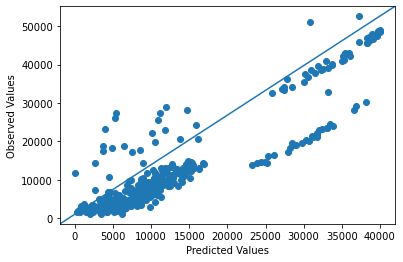

In [49]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
lr_pred = reg.predict(X_test)
print(reg.coef_)

fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(lr_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")

plt.show()

In [50]:
las_test = Lasso()
las_test.fit(X_train, y_train)
pred = las_test.predict(X_test)

print(mean_absolute_error(y_test, pred))

4012.472417382355


In [51]:
rdg_test = Ridge()
rdg_test.fit(X_train, y_train)
pred = rdg_test.predict(X_test)

print( mean_absolute_error(y_test, pred))

4018.9802041315265
